In [1]:
import qutip as qt
import numpy as np
from pyQTomo.labber_processing.nQubit_st import nQubitStateTomography
import matplotlib.pyplot as plt
import itertools as it

In [2]:
log_data = r'./data/QPT Identity 3Q.hdf5'
log_beta = r'./data/Beta Parameters.hdf5'

In [3]:
#Create an instance of the nQubitStateTomography class and pass in the data

# Data is for a 3 qubit process tomography of identity, but we can use this to benchmark
# the QST fitting

tomo = nQubitStateTomography(log_data, log_beta, 3, QPT=True)
betas, fits = tomo.getBetas(verbose=True)

C:\Program Files (x86)\Labber\Script\Labber\_include36\StepConfig.py:1: RuntimeWarning: divide by zero encountered in log10


0.9988083469327148


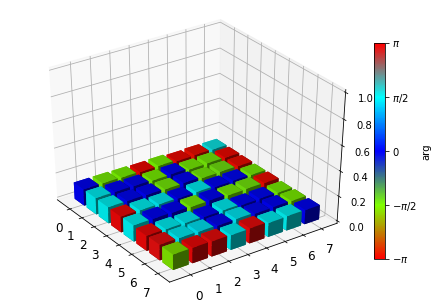

In [4]:

#QPT_idx ranges from 0...4^n
QPT_idx = 63

rho = tomo.getDMs(QPT_idx=QPT_idx)
rho = qt.Qobj(rho)
rhosq = rho*rho
print(f'Purity of the prepared input state is: {rhosq.tr()}')
state = [qt.basis(2, 0),
         qt.basis(2,1),
         (1/np.sqrt(2))*(qt.basis(2,0) + qt.basis(2,1)),
         (1/np.sqrt(2))*(qt.basis(2,0) + 1j*qt.basis(2,1))]
states = list(it.product(state, repeat=3))
states = [qt.tensor(list(val)) for val in states]
print('Final state Fidelity')
print(qt.fidelity(rho, qt.Qobj(np.array(qt.ket2dm(states[QPT_idx])))))


fig, ax = qt.visualization.matrix_histogram_complex(rho)
plt.show()